# Test notebook

In [1]:
# Import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import time

In [2]:
# Import written libraries
import src.utils as ut
import src.fuzz as fz
import src.classif as cl

In [3]:
# Hyperparameters
dim = 4
nb_classes = 3
nb_points_per_class = 100

# Generate positive gaussian random variables
data, labels = ut.dynamic_generate_positive_gaussian_data(
    dim=dim,
    nb_classes=nb_classes,
    nb_points_per_class=nb_points_per_class,
    seed=42
)
print(f"Generated {data.shape[0]} all-positive samples in {dim}D space.")

# Normalize data
data_norm = fz.batch_norm(data)
data_labels = ut.convert_to_float_lst(labels)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Generated 300 all-positive samples in 4D space.
Normalized data: 300 samples in 4D space.


In [4]:
[ut.enumerate_permute_batch(data_norm[i]) for i in range(data_norm.shape[0])]

[[[],
  [1],
  [0],
  [2],
  [3],
  [1, 0],
  [1, 2],
  [1, 3],
  [0, 2],
  [0, 3],
  [2, 3],
  [1, 0, 2],
  [1, 0, 3],
  [1, 2, 3],
  [0, 2, 3],
  [1, 0, 2, 3]],
 [[],
  [3],
  [2],
  [0],
  [1],
  [3, 2],
  [3, 0],
  [3, 1],
  [2, 0],
  [2, 1],
  [0, 1],
  [3, 2, 0],
  [3, 2, 1],
  [3, 0, 1],
  [2, 0, 1],
  [3, 2, 0, 1]],
 [[],
  [2],
  [1],
  [0],
  [3],
  [2, 1],
  [2, 0],
  [2, 3],
  [1, 0],
  [1, 3],
  [0, 3],
  [2, 1, 0],
  [2, 1, 3],
  [2, 0, 3],
  [1, 0, 3],
  [2, 1, 0, 3]],
 [[],
  [3],
  [0],
  [1],
  [2],
  [3, 0],
  [3, 1],
  [3, 2],
  [0, 1],
  [0, 2],
  [1, 2],
  [3, 0, 1],
  [3, 0, 2],
  [3, 1, 2],
  [0, 1, 2],
  [3, 0, 1, 2]],
 [[],
  [2],
  [3],
  [1],
  [0],
  [2, 3],
  [2, 1],
  [2, 0],
  [3, 1],
  [3, 0],
  [1, 0],
  [2, 3, 1],
  [2, 3, 0],
  [2, 1, 0],
  [3, 1, 0],
  [2, 3, 1, 0]],
 [[],
  [2],
  [1],
  [3],
  [0],
  [2, 1],
  [2, 3],
  [2, 0],
  [1, 3],
  [1, 0],
  [3, 0],
  [2, 1, 3],
  [2, 1, 0],
  [2, 3, 0],
  [1, 3, 0],
  [2, 1, 3, 0]],
 [[],
  [0],
  [1],
  

[0, 0.06942384274609337, 0.0794193689889866, 0.08565824959643054, 0.10410964938416634, 0.12839428945412523, 0.1918673247187429, 0.22665640222698802, 0.27416066655980587, 0.32337156211552076, 0.3549963058319373, 0.5783869170064091, 0.6924361513243696, 0.7243388171287412, 0.8941908746641183, 0.9912559937021883]
Leave one out avec k = 1
SimLevel1: 0.3
SimLevel2: 0.31
SimLevel3: 0.3

Result in 11.7471 seconds.
[0, 0.0676125635922149, 0.23371208191043302, 0.3243337531153756, 0.33300191305819793, 0.5190597909082704, 0.5329577865513353, 0.5400119146045106, 0.5577834173700249, 0.6508773690471942, 0.6618391898493786, 0.6694869551981901, 0.7306505102392461, 0.8003565078223616, 0.8800790875614583, 0.9941393612211675]
Leave one out avec k = 2
SimLevel1: 0.34
SimLevel2: 0.33666666666666667
SimLevel3: 0.34

Result in 11.2308 seconds.
[0, 0.060142342600785215, 0.09667644964671962, 0.17530294235765964, 0.20093368865905648, 0.3475715242389821, 0.45037093625818514, 0.46520561228371815, 0.535827684473081

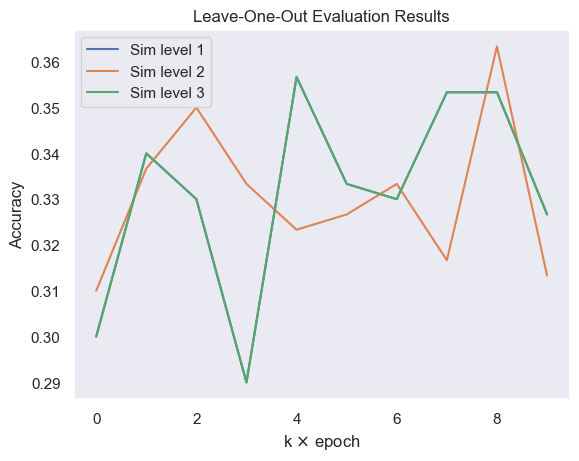

In [5]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10



for k in range(1, k+1): 
    tic = time.time()
    mu = fz.generate_capacity(ut.enumerate_permute_batch(data_norm[0]),2**len(data_norm[0])-1)
    print(mu)

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = cl.leave_one_out(
            C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = cl.leave_one_out(
            C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel2), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = cl.leave_one_out(
            C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel3), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1")
plt.plot(l2, label="Sim level 2")
plt.plot(l3, label="Sim level 3")

# Config additional params
plt.ylabel("Accuracy")
plt.xlabel(r"k $\times$ epoch")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()
plt.savefig("archive/accuracy.png")

In [17]:
ktest = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel2)

In [18]:
ktest.train(data_norm, data_labels)

In [31]:
X = data_norm[0,:2]
Y = data_norm[1,:2]

In [32]:
mu

[0,
 0.06942384274609337,
 0.0794193689889866,
 0.08565824959643054,
 0.10410964938416634,
 0.12839428945412523,
 0.1918673247187429,
 0.22665640222698802,
 0.27416066655980587,
 0.32337156211552076,
 0.3549963058319373,
 0.5783869170064091,
 0.6924361513243696,
 0.7243388171287412,
 0.8941908746641183,
 0.9912559937021883]

In [33]:
sim = fz.SimLevel1(X, Y, mu)

In [34]:
sim.score(verbose=True)

Intersection: 0.032140427470778506, Union: 0.15152968129183447


0.21210648103244223

In [ ]:
tmp = []
# TODO: enumerate desc_set
for i in range(data_norm.shape[0]):
    permute = ut.enumerate_permute_batch(data_norm[0])

    # Sort following permute
    for i in range(len(permute)):
        permute[i] = data_norm[0][permute[i]]
    tmp.append(permute)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (300, 16) + inhomogeneous part.

In [51]:
class KNNFuzz(cl.KNN):
    def __init__(self, input_dimension,mu, k=3, sim=fz.SimLevel1):
        """ KNN avec une distance de type fuzz
            k: le nombre de voisins à prendre en compte
            sim: la fonction de similarité à utiliser
        """
        super().__init__(input_dimension=input_dimension, k=k)
        self.sim = sim
        self.mu = mu
    

    # TODO: Fix similarity implementation
    def score(self, x):
        from collections import Counter
        """ Rend la proportion des labels parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        # Compute similarity between x and all points in desc_set
        similarity = np.array([self.sim(x, desc, self.mu).score() for desc in self.desc_set])
        # print(f"Similarity: {similarity}")

        # distances = np.sqrt(np.sum((self.desc_set - x) ** 2, axis=1))
        nearest_indices = np.argsort(similarity)[:self.k]
        # print(f"Nearest indices: {nearest_indices}")
        nearest_labels = self.label_set[nearest_indices]
        # print(f"Nearest labels: {nearest_labels}")
        
        label_counts = Counter(nearest_labels)
        # print(f"Label counts: {label_counts}")
        return max(label_counts.items(), key=lambda item: (item[1], -item[0]))[0]

    def predict(self, x):
        """ Rend la prédiction sur x (label de 0 à 9)
            x: une description : un ndarray
        """
        return int(self.score(x))

    def train(self, desc_set, label_set):
        """ Permet d'entraîner le modèle sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        self.desc_set = desc_set
        self.label_set = label_set

        tmp = []
        # TODO: enumerate desc_set
        for i in range(desc_set.shape[0]):
            # print(f"Desc set {i}: {desc_set[i]}")
            permute = ut.enumerate_permute_batch(desc_set[0])

            # Sort following permute
            for i in range(len(permute)):
                permute[i] = desc_set[0][permute[i]]
            tmp.append(permute)
        self.desc_set = tmp

In [52]:
model = KNNFuzz(input_dimension=data_norm.shape[1], mu=mu, k=k, sim=fz.SimLevel1)

In [53]:
model.train(data_norm, data_labels)

In [57]:
model.desc_set[0]

[array([], dtype=float64),
 array([0.]),
 array([0.51793744]),
 array([0.98738425]),
 array([1.]),
 array([0.        , 0.51793744]),
 array([0.        , 0.98738425]),
 array([0., 1.]),
 array([0.51793744, 0.98738425]),
 array([0.51793744, 1.        ]),
 array([0.98738425, 1.        ]),
 array([0.        , 0.51793744, 0.98738425]),
 array([0.        , 0.51793744, 1.        ]),
 array([0.        , 0.98738425, 1.        ]),
 array([0.51793744, 0.98738425, 1.        ]),
 array([0.        , 0.51793744, 0.98738425, 1.        ])]

In [65]:
x = [0, 0.5]

In [84]:
def get_dim_list(lst, dim):
    # Get list of items in lst that have dimension dim
    l = []
    for i in range(len(lst)):
        if len(lst[i]) == dim:
            l.append(lst[i])
    return l if l else None

In [85]:
len(tmp[0][0])

0

In [86]:
tmp[0]

[array([], dtype=float64),
 array([0.]),
 array([0.51793744]),
 array([0.98738425]),
 array([1.]),
 array([0.        , 0.51793744]),
 array([0.        , 0.98738425]),
 array([0., 1.]),
 array([0.51793744, 0.98738425]),
 array([0.51793744, 1.        ]),
 array([0.98738425, 1.        ]),
 array([0.        , 0.51793744, 0.98738425]),
 array([0.        , 0.51793744, 1.        ]),
 array([0.        , 0.98738425, 1.        ]),
 array([0.51793744, 0.98738425, 1.        ]),
 array([0.        , 0.51793744, 0.98738425, 1.        ])]

In [89]:
tmp[0]

[array([], dtype=float64),
 array([0.]),
 array([0.51793744]),
 array([0.98738425]),
 array([1.]),
 array([0.        , 0.51793744]),
 array([0.        , 0.98738425]),
 array([0., 1.]),
 array([0.51793744, 0.98738425]),
 array([0.51793744, 1.        ]),
 array([0.98738425, 1.        ]),
 array([0.        , 0.51793744, 0.98738425]),
 array([0.        , 0.51793744, 1.        ]),
 array([0.        , 0.98738425, 1.        ]),
 array([0.51793744, 0.98738425, 1.        ]),
 array([0.        , 0.51793744, 0.98738425, 1.        ])]

In [87]:
get_dim_list(tmp[0], 2)

[array([0.        , 0.51793744]),
 array([0.        , 0.98738425]),
 array([0., 1.]),
 array([0.51793744, 0.98738425]),
 array([0.51793744, 1.        ]),
 array([0.98738425, 1.        ])]

In [97]:
similarity = []
for i in range(len(tmp)):
    desc = get_dim_list(tmp[i], len(x))
    sim = np.array(
        [fz.SimLevel1(x, desc[j], mu).score() for j in range(len(desc))]
    )
    max_sim = np.max(sim)
    similarity.append(max_sim)
len(similarity)

300

In [98]:
nearest_indices = np.argsort(similarity)[:3]

In [100]:
nearest_labels = labels[nearest_indices]

In [102]:
from collections import Counter

In [103]:
label_counts = Counter(nearest_labels)